In [1]:
import ae
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from time import sleep

2022-10-07 12:39:56.876680: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-07 12:39:57.026330: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-07 12:39:57.640352: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/can/.local/lib/python3.8/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/cuda-11.2/lib64:
2022-10-07 12:39:57.640446: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not

In [8]:
ds_dir = "../gtsrb/cropped_train/17/"
IMG_HEIGHT = 48
IMG_WIDTH = 48
IMG_CHANNEL = 3
VAL_SIZE = 0.2

lr = 0.0005
batchSize = 64
epochs = 100
lossFunc = MeanSquaredError()

weight_dir = "../ae_weights/"
ds_name = "17"
model_name = "model1"
loss_type = "mse"
ds_type = "full"

In [3]:
for i in range(43):
    ds_dir = "../gtsrb/cropped_train/"+str(i)+"/"
    ds_name = str(i)
    autoencoder = ae.autoEncoder()
    autoencoder.dataset(ds_dir, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL, VAL_SIZE)
    ae_model = autoencoder.model1()
    autoencoder.train(ae_model, lr, lossFunc, batchSize, epochs)
    autoencoder.saveModel(weight_dir, ds_name, model_name, loss_type, ds_type)
    del autoencoder
    sleep(2)

#All images:  210
Train image set shape:  (168, 48, 48, 3) Validation image set shape:  (42, 48, 48, 3)


2022-10-07 00:38:01.468624: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 00:38:01.476486: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/can/.local/lib/python3.8/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/cuda-11.2/lib64:
2022-10-07 00:38:01.476507: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-10-07 00:38:01.477078: I tenso

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 16)        1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                    

/home/can/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3/3 [==============================] - 2s 506ms/step - loss: 0.2710 - accuracy: 0.3624 - val_loss: 0.1615 - val_accuracy: 0.3733
Epoch 2/100
3/3 [==============================] - 1s 302ms/step - loss: 0.2306 - accuracy: 0.4357 - val_loss: 0.1530 - val_accuracy: 0.5425
Epoch 3/100
3/3 [==============================] - 1s 295ms/step - loss: 0.1832 - accuracy: 0.5725 - val_loss: 0.1902 - val_accuracy: 0.6468
Epoch 4/100
3/3 [==============================] - 1s 298ms/step - loss: 0.2064 - accuracy: 0.6159 - val_loss: 0.1686 - val_accuracy: 0.6416
Epoch 5/100
3/3 [==============================] - 1s 307ms/step - loss: 0.1668 - accuracy: 0.6040 - val_loss: 0.1163 - val_accuracy: 0.6210
Epoch 6/100
3/3 [==============================] - 1s 299ms/step - loss: 0.1281 - accuracy: 0.5769 - val_loss: 0.0964 - val_accuracy: 0.5688
Epoch 7/100
3/3 [==============================] - 1s 300ms/step - loss: 0.0961 - accuracy: 0.5047 - val_loss: 0.0876 - val_accuracy: 0.3764
Epoch 8/100
3/3 [========

In [18]:
weight_file = "../ae_weights/12fullmodel1mse.h5"
autoe = ae.autoEncoder()
model = autoe.loadModel(weight_file)

Destructor called, Employee deleted.


In [19]:
import os
from PIL import Image
import numpy as np
test_data = []
BASE_PATH = "../gtsrb/"
TEST_PATH = BASE_PATH + 'damaged_noentry/web_imgs/'
test_noentry = os.path.join(TEST_PATH)
for img in os.listdir(test_noentry):
    image = Image.open(os.path.join(test_noentry, img)).convert('RGB')
    image = image.resize((IMG_HEIGHT,IMG_WIDTH))
    image = np.array(image)
    image = image/255.0
    test_data.append(image)

test_data = np.array(test_data)            
gen = model.predict(test_data)
tensor_test = tf.convert_to_tensor(test_data, dtype=tf.float32)

1/1 [==============================] - 0s 166ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


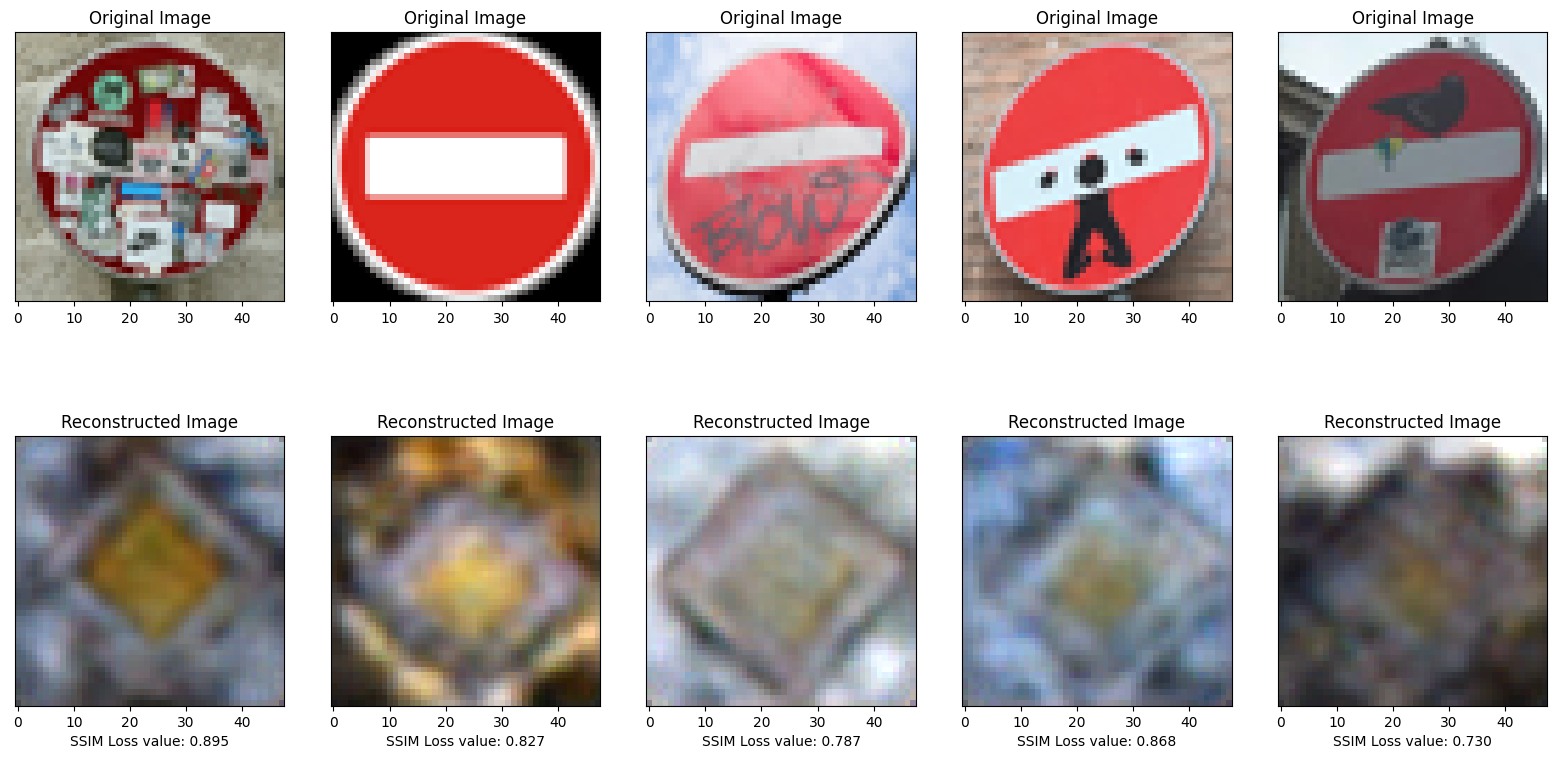

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 14), dpi=100)
plt.subplots_adjust( wspace=0.1, hspace=0.5)
plt_a=1
n=5
for i in range(n):
    # Original training dataset vs Original training
    ax = plt.subplot(3, n, plt_a   )
    plt.imshow(test_data[i].reshape(48,48,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    # value_a = SSIMLoss(img_val[i], img_val[i])
    ax.set_title("Original Image")
    # label = 'SSIM Loss value: {:.3f}'
    # ax.set_xlabel(label.format(value_a) )
    
    # Reconstructed good data  vs Original training data
    ax = plt.subplot(3, n, plt_a + n )
    plt.imshow(gen[i].reshape(48,48,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)    
    value_a = autoe.SSIMLoss(tensor_test[i], gen[i])
    ax.set_title("Reconstructed Image")
    label = 'SSIM Loss value: {:.3f}'
    ax.set_xlabel(label.format(value_a) )

    plt_a+=1
plt.show()